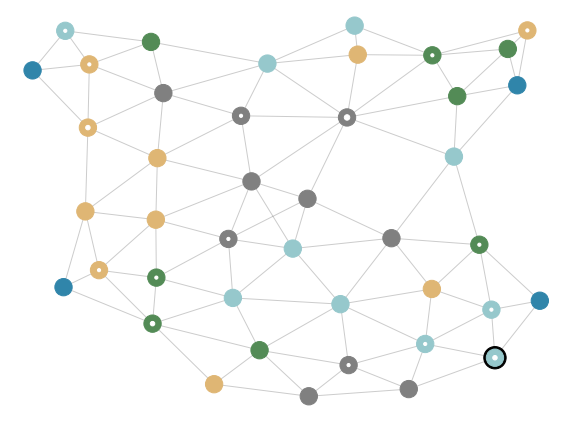


turn = 0, priority = 2
S Explore


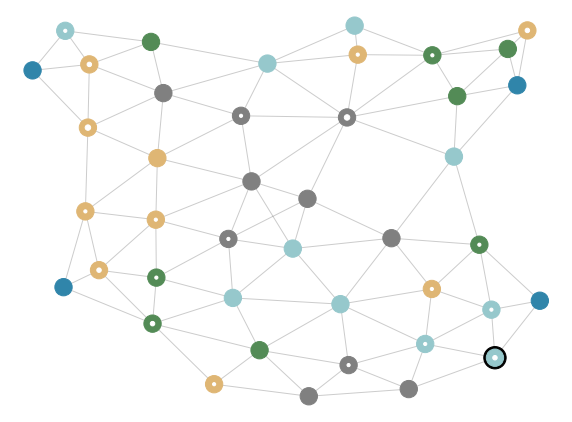


turn = 1, priority = 1
S Build


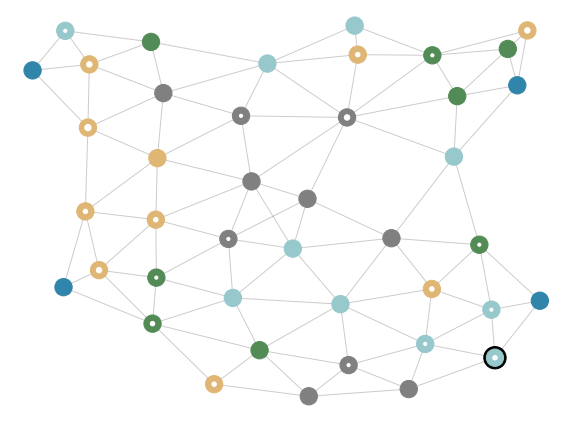


turn = 1, priority = 2
W Explore


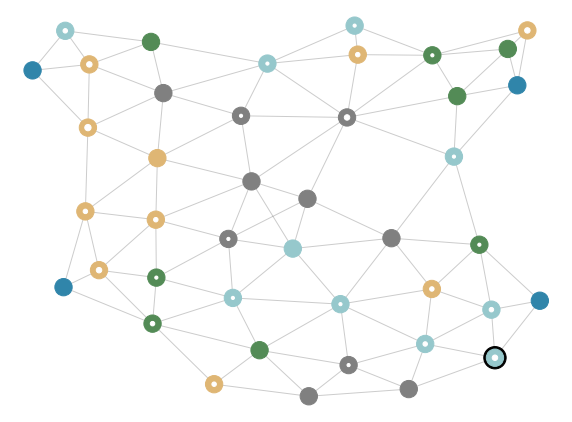


turn = 2, priority = 0
S Ravage


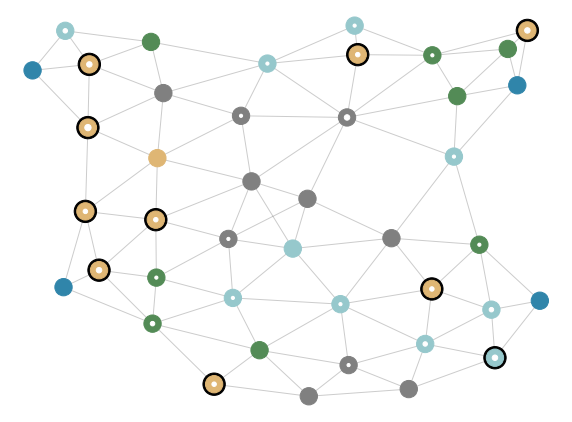


turn = 2, priority = 1
W Build


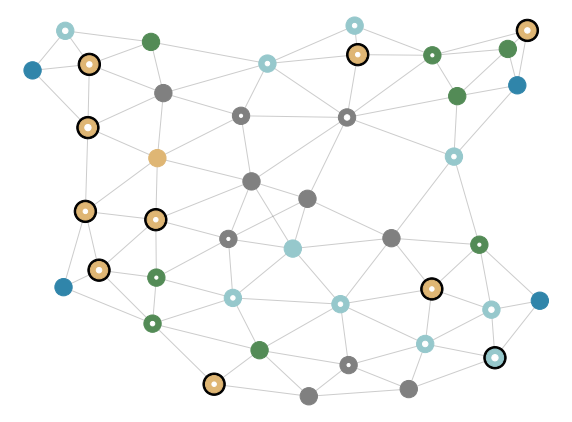


turn = 2, priority = 2
M+J Explore


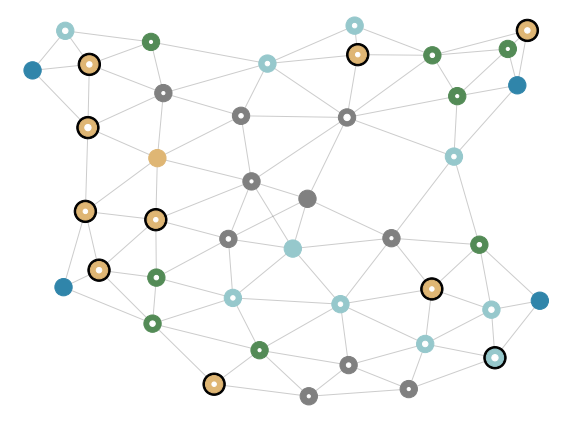


turn = 3, priority = 0
W Ravage


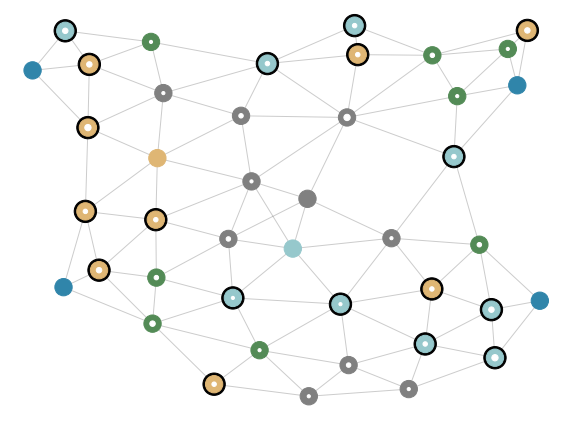


turn = 3, priority = 1
M+J Build


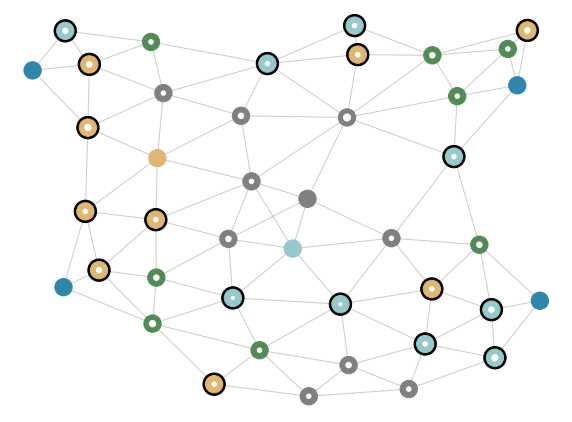


turn = 3, priority = 2
J+W Explore


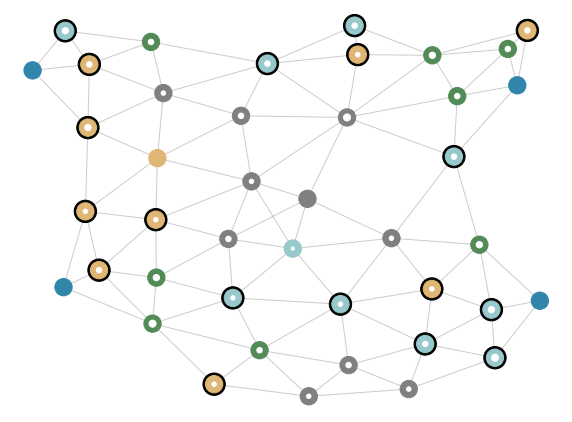


turn = 4, priority = 0
M+J Ravage


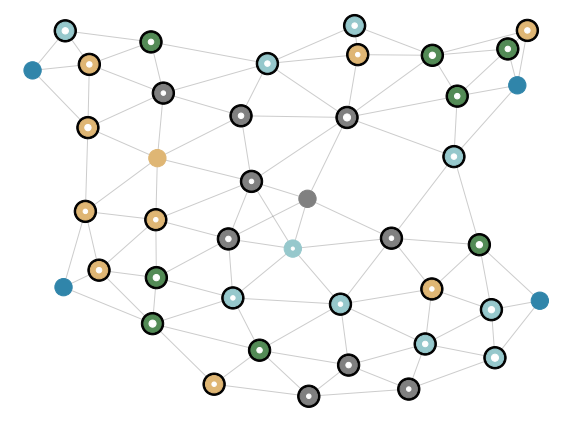


turn = 4, priority = 1
J+W Build


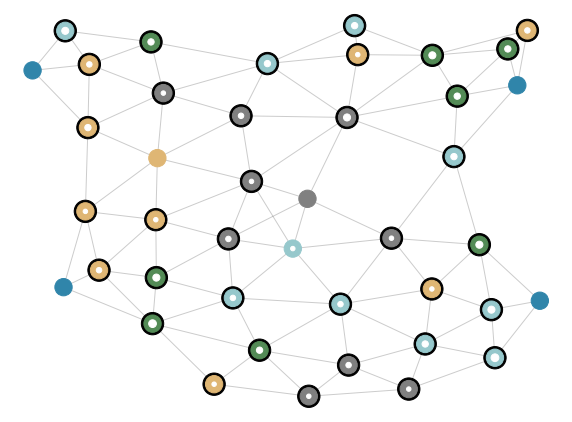


turn = 5, priority = 0
J+W Ravage


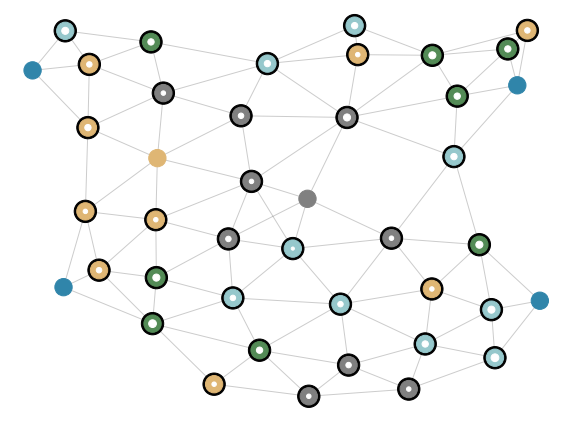

In [69]:
from components.actions.invader import Explore, Build, Ravage
from components.states.board import thematic
from queue import PriorityQueue

# Set up invader deck and thematic map
invader_deck = ['S', 'W', 'MJ', 'JW']
playthrough = thematic.copy()
print(playthrough)

# Generate all events for the invader deck (lower number = higher priority)
queue = PriorityQueue()
for t, lands in enumerate(invader_deck):
    lands = list(lands)
    queue.put((t+0, 2, Explore(lands)))
    queue.put((t+1, 1, Build(lands)))
    queue.put((t+2, 0, Ravage(lands)))

# Apply invader actions step by step
while not queue.empty():
    turn, priority, action = queue.get()
    playthrough = playthrough.apply(action)
    print(f'{turn = }, {priority = }')
    print(action)
    print(playthrough)